<a href="https://colab.research.google.com/github/cxmedeiros/Bioinspirada/blob/main/Problema_da_Mochila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema da mochila (Knapsack Problem)** 🎒

Dado **N** itens, onde cada item possui um peso e um lucro associado, e também
dado um saco com capacidade **W**, ou seja, o saco pode conter no máximo um
peso de **W**. A tarefa consiste em colocar os itens no saco de forma que a soma
dos lucros associados a eles seja a máxima possível.

*Observação:* A restrição aqui é que podemos colocar um item inteiramente no
saco ou não colocá-lo de forma alguma, não é possível colocar uma parte de um
item no saco.

**N = 100, W = 100, pesos entre 1 e 50, lucro entre 1 e 1000**


## **Parâmetros para a geração da população:**

* 70% para filhos gerados por crossover
* 20% para filhos mutados
* 10% para filhos sobreviventes
* Taxa de Mutação: 0.05 (5%)
* Taxa de Crossover: 0.8 (80%)
* Tamanho do torneio: 5.

## **Grupo:** 📚
*   Breno Mendes (bmmuc)
* Camila Xavier (cxm)
* Victor Silva (vsmo)




# Implementação 💻

In [ ]:
import random
import time

N = 100 # número de itens
W = 100 # peso máximo

melhores_fitness = []
pesos_finais = []
geracoes = []
tempos = []

for _ in range(100): # 100 runs
  a = time.time()
  pesos = [random.randint(1, 50) for _ in range(N)] # o peso de cada item pode ir de 1 até 50
  lucros = [random.randint(1, 1000) for _ in range(N)] # o lucro de cada item pode ir de 1 até 100

  historico_fitness = []
  historico_de_peso = []

  # parâmetros utilizados no algoritmo bioinspirado
  TAXA_MUTACAO = 0.05
  TAXA_CROSSOVER = 0.8
  TAMANHO_TORNEIO = 5
  TAMANHO_POPULACAO = 100
  NUMERO_GERACOES = 100
  GERACAO_QUE_ATINGIU_O_MAIOR = 0
  MELHOR_FITNESS_GLOBAL = 0
  CONTADOR = 0
  FITNESS_ANTERIOR = 0

  # mede o total de lucros dos itens dentro da mochila, desde que o peso total não ultrapasse a capacidade máxima permitida
  def calcular_fitness(individuo, is_last = False):
      peso_total = sum(peso for peso, incluido in zip(pesos, individuo) if incluido)
      lucro_total = sum(lucro for lucro, incluido in zip(lucros, individuo) if incluido)
      if peso_total <= W:
          return lucro_total
      else:
          #return lucro_total - lucro_total
          return lucro_total/peso_total * 10 # Caso o peso exceda a capacidade, a função de aptidão impõe uma penalidade,

  # gerando cada indivíduo
  #def gerar_individuo():
      #individuo = [random.choice([True, False]) for _ in range(N)]
      #return individuo

  #gerar indivíduo inicialmente que tenha peso menoor que 100
  def gerar_individuo():
    individuo = [False] * N
    peso_atual = 0
    while peso_atual < 100:
        index = random.randint(0, N - 1)
        if not individuo[index]:
            individuo[index] = True
            peso_atual += pesos[index]
    return individuo



  populacao = [gerar_individuo() for _ in range(TAMANHO_POPULACAO)]

  # seleção de individuos que compara um subconjunto aleatório de indivíduos e escolhe o mais apto para passar seus genes para frente,
  def selecionar_por_torneio(populacao):
      selecionados = random.sample(populacao, TAMANHO_TORNEIO)
      selecionados.sort(key=lambda ind: calcular_fitness(ind), reverse=True)

      return random.choice(selecionados[:3])

  # um ponto de crossover é escolhido aleatoriamente para misturar genes dos pais.
  def crossover(pai1, pai2):
      if random.random() < TAXA_CROSSOVER:
          ponto_corte = random.randint(1, N-1)
          filho1 = pai1[:ponto_corte] + pai2[ponto_corte:]
          filho2 = pai2[:ponto_corte] + pai1[ponto_corte:]
          return [filho1, filho2]

      return [pai1, pai2]

  # gerando mutações, invertendo os booleanos
  def mutar(individuo):
      return [not gene if random.random() < TAXA_MUTACAO else gene for gene in individuo]

  # gerando a população
  for geracao in range(NUMERO_GERACOES):
      if CONTADOR == 25: # se o fitness não alterar depois de 25 vezes, acabamos com a run do experimento
        break
      nova_populacao = []
      melhor_fitness = calcular_fitness(max(populacao, key=calcular_fitness))
      historico_fitness.append(melhor_fitness)
      melhor_individuo = max(populacao, key=calcular_fitness)
      peso_total = sum(peso for peso, incluido in zip(pesos, melhor_individuo) if incluido)
      historico_de_peso.append(peso_total)
      for _ in range(int(TAMANHO_POPULACAO * 0.7)): # 70% para filhos com crossover
          pai1 = selecionar_por_torneio(populacao)
          pai2 = selecionar_por_torneio(populacao)
          tentativas_maximas = 10
          tentativas = 0

          # se o pai 1 for igual ao pai 2 pelo torneio, depois de 10 tentativas, muta-se o pai 2
          while pai1 == pai2 and tentativas < tentativas_maximas:
              pai2 = selecionar_por_torneio(populacao)
              tentativas += 1

          if tentativas == tentativas_maximas:
              pai2 = mutar(pai2)
          filhos = crossover(pai1, pai2)
          nova_populacao.extend(filhos)

      for _ in range(int(TAMANHO_POPULACAO * 0.2)): # 20% para filhos mutados
          individuo = random.choice(populacao)
          filho_mutado = mutar(individuo)
          nova_populacao.append(filho_mutado)

      sobreviventes = random.sample(populacao, int(TAMANHO_POPULACAO * 0.1)) # 10% para filhos sobreviventes
      nova_populacao.extend(sobreviventes)

      while len(nova_populacao) > TAMANHO_POPULACAO:
          nova_populacao.pop()

      melhor_individuo = max(populacao, key=calcular_fitness)
      melhor_fitness = calcular_fitness(melhor_individuo)

      # calcula o melhor fitness de cada run
      if MELHOR_FITNESS_GLOBAL < melhor_fitness:
        MELHOR_FITNESS_GLOBAL = melhor_fitness
        GERACAO_QUE_ATINGIU_O_MAIOR = geracao

      if FITNESS_ANTERIOR == melhor_fitness:
        CONTADOR += 1
      else:
        CONTADOR = 0
      FITNESS_ANTERIOR = melhor_fitness
      populacao = nova_populacao

  b = time.time()


  melhor_individuo = max(populacao, key=calcular_fitness)

  melhor_fitness = calcular_fitness(melhor_individuo, True)

  pesos_finais.append(historico_de_peso[-1])
  # lista para a geração que atingiu o melhor fitness de cada run
  geracoes.append(GERACAO_QUE_ATINGIU_O_MAIOR)

  # lista para os melhores fitness de cada run
  melhores_fitness.append(melhor_fitness)

  # lista para o tempo que demora pra cada run
  tempos.append(b - a)

  print(melhor_individuo, melhor_fitness) # printando o melhor indivíduo (mochila) e o melhor fitness (lucro da mochila) de cada run

[False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True] 7948
[True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, True, False, False, False, False, False, False, False, Tr

# Plotando gráficos 📊

## Histórico de Fitness e peso ao longo das 100 gerações da última run ⏳

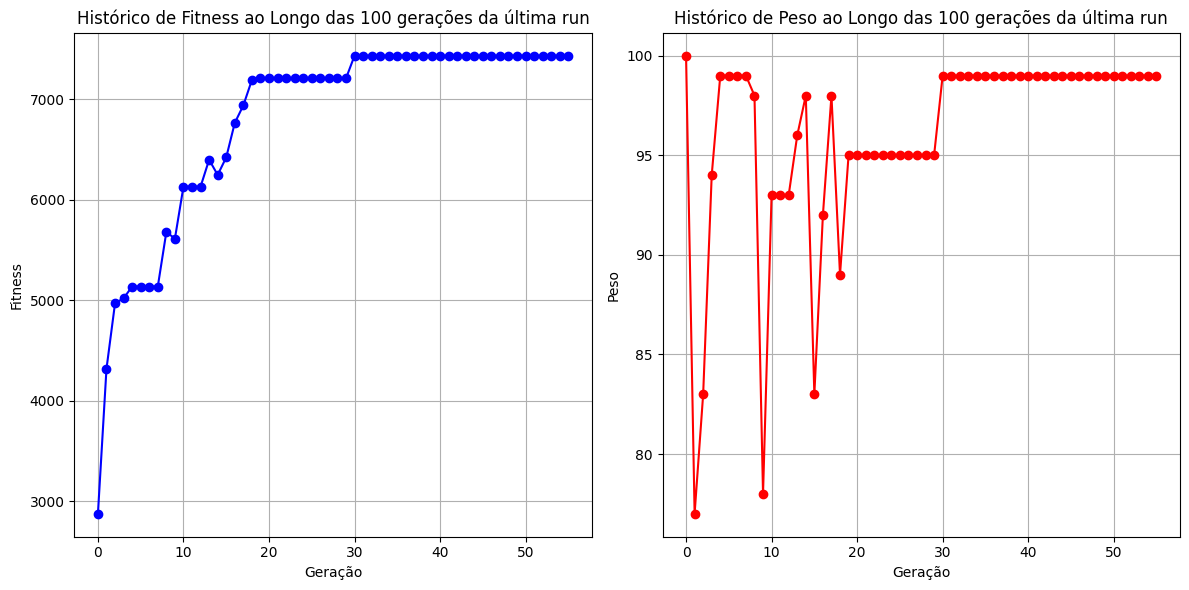

In [ ]:
import matplotlib.pyplot as plt
# Criando os gráficos
plt.figure(figsize=(12, 6))

# Gráfico do histórico de fitness
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, posição 1
plt.plot(historico_fitness, marker='o', linestyle='-', color='b')
plt.title('Histórico de Fitness ao Longo das 100 gerações da última run')
plt.xlabel('Geração')
plt.ylabel('Fitness')
plt.grid(True)

# Gráfico do histórico de peso
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, posição 2
plt.plot(historico_de_peso, marker='o', linestyle='-', color='r')
plt.title('Histórico de Peso ao Longo das 100 gerações da última run')
plt.xlabel('Geração')
plt.ylabel('Peso')
plt.grid(True)

# Mostrando os gráficos
plt.tight_layout()
plt.show()

## Melhores fitness das 100 runs ✅

<Axes: title={'center': 'Histórico de Fitness das runs'}, xlabel='Fitness', ylabel='Count'>

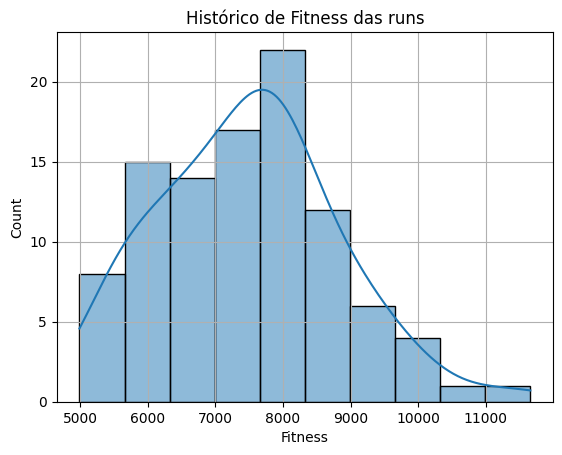

In [ ]:
import seaborn as sns
plt.title('Histórico de Fitness das runs')
plt.xlabel('Fitness')
plt.ylabel('Count')
plt.grid(True)
sns.histplot(melhores_fitness,kde=True)

### Média e desvio padrão dos melhores fitness das 100 runs 🔢

In [ ]:
import numpy as np
media = np.average(melhores_fitness)
print(media)

7494.98


In [ ]:
desvio = np.std(melhores_fitness)
print(desvio)

1315.6628822004518


In [ ]:
media - desvio, media + desvio

(6179.317117799548, 8810.642882200451)

## Histórico de pesos dos melhores indivíduos a cada run 🏃

<Axes: title={'center': 'Histórico de pesos dos melhores indivídios a cada run'}, xlabel='Fitness', ylabel='Count'>

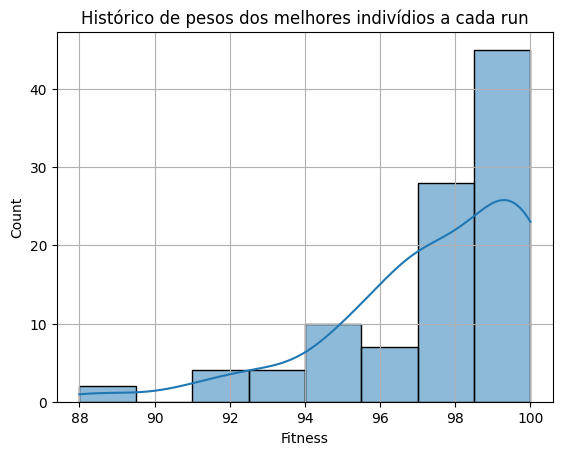

In [ ]:
import seaborn as sns
plt.title('Histórico de pesos dos melhores indivídios a cada run')
plt.xlabel('Fitness')
plt.ylabel('Count')
plt.grid(True)
sns.histplot(pesos_finais,kde=True)

### média e desvio padrão dos pesos dos melhores indivpiduos a cada run 🏃

In [ ]:
import numpy as np
media = np.average(pesos_finais)
print(media)

97.44


In [ ]:
desvio = np.std(pesos_finais)
print(desvio)

2.6241951146970757


In [ ]:
media - desvio, media + desvio

(94.81580488530292, 100.06419511469707)

## Tempo gasto para rodar cada run (com 100 gerações) ⏰

<Axes: title={'center': 'Tempo de execução das runs'}, xlabel='tempo (s)', ylabel='Count'>

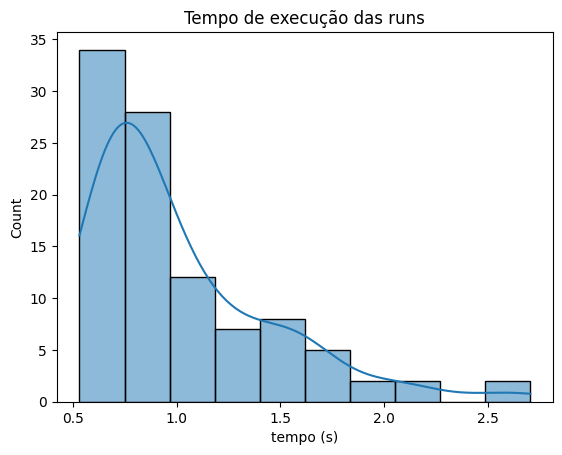

In [ ]:
import seaborn as sns
plt.title('Tempo de execução das runs')
plt.xlabel('tempo (s)')
plt.ylabel('Count')
sns.histplot(tempos,kde=True)

### Média e desvio do tempo gasto para rodar cada run (com 100 gerações) 🔢

In [ ]:
import numpy as np
media = np.average(tempos)
print(media)

1.0131537747383117


In [ ]:
desvio = np.std(tempos)
print(desvio)

0.4428766960166787


In [ ]:
media - desvio, media + desvio

(0.570277078721633, 1.4560304707549903)

## Em qual geração cada run alcançou o melhor fitness 🧒

<Axes: title={'center': 'Histórico da geração que atingiu melhor fitness das runs'}, xlabel='Geração', ylabel='Count'>

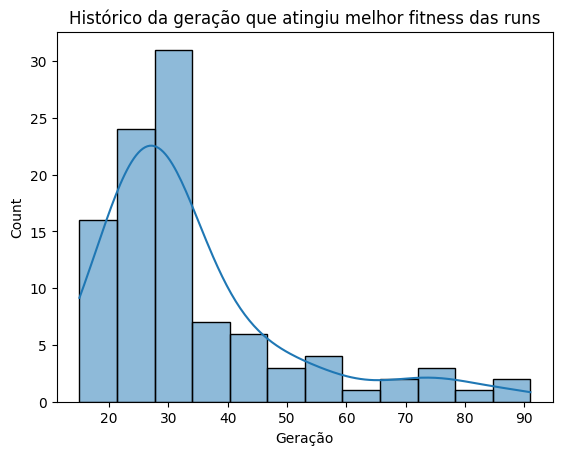

In [ ]:
import seaborn as sns
plt.title('Histórico da geração que atingiu melhor fitness das runs')
plt.xlabel('Geração')
plt.ylabel('Count')
sns.histplot(geracoes,kde=True)

### Média e desvio padrão de qual geração cada run alcançou o melhor fitness 🔢

In [ ]:
media = np.average(geracoes)
print(media)

34.04


In [ ]:
print(desvio)
desvio = np.std(geracoes)

0.4428766960166787


In [ ]:
media - desvio, media + desvio

(17.987635688161074, 50.09236431183892)